# Codio Coding Activity 21.1: Coding K-Means Using Scikit-learn


Learning Outcome Addressed:
- 2. Implement k-means using Scikit-learn.



## Activity Overview

This activity is designed to consolidate your knowledge about k-means clustering and allow you to practice how to define k-means *clusters* in Python using the Scikit-learn *library*. You will be challenged to define the optimal number of *clusters* for the data that is provided. You'll use a synthetic dataset from Scikit-learn to visualize the *clusters* and choose an optimal number for the data.

Run the code cell below to import the necessary *libraries* for this activity:

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Question 1

*3 points*

In the code cell below, use the `make_blobs()` *function* from the Scikit-learn *library* to generate the data for a classification problem with two *classes*. Inside the *function*, define the `n_samples` *argument* to be equal to 300, `centers` *argument* to be equal to 3, `cluster_std` *argument* to be equal to 0.60, and `random_state` *argument* to be equal to 0.

Define your features to be `X` and your labels to be `y_true`.

In [2]:
### GRADED

### YOUR SOLUTION HERE
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=.6, random_state=0)


Run the code cells below to retrieve the first five elements for each of the variables returned by the `make_blobs()` *function*:

In [11]:
X[:5]

array([[ 0.42857674,  4.9739971 ],
       [ 1.61990909,  0.06764529],
       [ 1.43289271,  4.37679234],
       [-1.57846247,  3.03445802],
       [-1.65862863,  2.26746029]])

In [12]:
y_true[:5]

array([0, 1, 0, 2, 2])

## Question 2

*3 points*

In the code cell below, use the `scatter()` *function* from Matplotlib to produce a scatterplot of your features `X`. Set the size of your `s` *marker* equal to 50. Add a title to your *plot* with the following words: `A plot of my features`.

Use the `Matplotlib()` `savefig()` *function* to save your *plot* as a png file with the name `plot1.png` in the `results` *folder*.

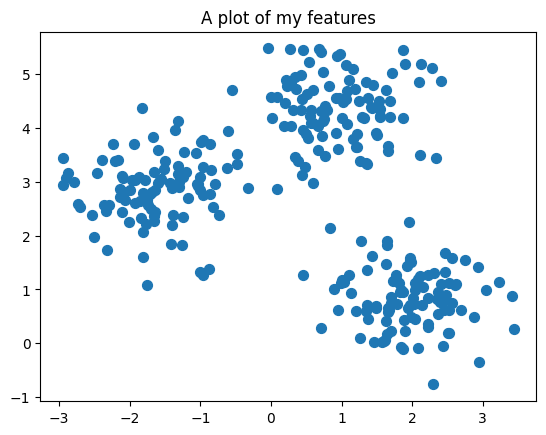

In [3]:
### GRADED 

### YOUR SOLUTION HERE
# X[:, 0] means all the rows of the first column
# X[:, 1] means all the rows of the second column
# s=50 means the size of the dots
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('A plot of my features')
plt.savefig('results/plot1.png')

## Question 3

*4 points*

Following the example in Mini-Lesson 21.2, use the `StandardScaler()` *class* from Scikit-learn to feature scale your data. Define the feature scaler to be `scaler`. Next, apply the `fit_transform()` *function* to `scaler` to scale your features `X`. 

Define your scaled features to be `X_scaled`.

Below, the pseudocode to solve this question is provided:

```Python
scaler  = StandardScaler()
scaled_features = scaler.fit_transform(features)
```

Run the code cells below:

In [5]:
### GRADED

### YOUR SOLUTION HERE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Run the code cell below to take a look at how the values have been scaled in `scaled_features`:

In [6]:
X_scaled[:5]

array([[-0.00288843,  1.46120589],
       [ 0.73445459, -1.67573046],
       [ 0.61870585,  1.07937569],
       [-1.2450912 ,  0.22113774],
       [-1.29470788, -0.26925169]])

## Question 4

*3 points*

In the code cell below, use the `scatter()` *function* from Matplotlib to produce a scatterplot of your scaled features, `X_scaled`. Set the size of your `s` *marker* equal to 50. Add a title to your *plot* with the following words: `A plot of my scaled features`.

Use the `Matplotlib()` `savefig()` *function* to save your *plot* as a png file with the name `plot2.png` in the `results` *folder*.

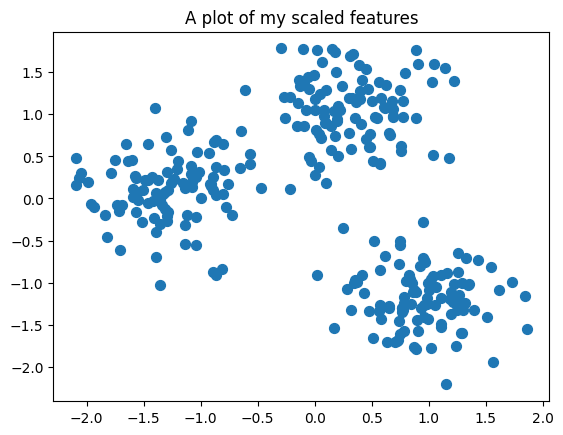

In [7]:
### GRADED 

### YOUR SOLUTION HERE
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=50)
plt.title('A plot of my scaled features')
plt.savefig('results/plot2.png')

You can see that the *plot* above looks similar to the original feature data, but the data appears shifted and scaled. Note the different axes.

## Question 5

*5 points*

Now the data points are ready to be clustered.

In the code cell below, instantiate the `KMeans` *class* with the following *arguments*: `init` equal to `"random"`, `n_clusters` equal to `4`, and `random_state` equal to `42`. Define the classifier to be `kmeans`.

Next, apply the `fit()` *function* to the `kmeans` classifier to fit your model.

Finally, make a prediction on your data by applying the `predict()` *function* to the `kmeans` classifier. Pass the scaled features to this *function*. Define your predictions to be `y_means`.

Below, the pseudocode to solve this question is provided:

```Python
kmeans = KMeans(...,...,...)
kmeans.fit(scaled_features)
y_kmeans = kmeans.predict(scaled_features)
```

In [8]:
### GRADED

### YOUR SOLUTION HERE
kmeans = KMeans(init="random", n_clusters=4, random_state=42)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)

Run the code cell below to *plot* the data colored by the new labels. Also, *plot* the *cluster* centers as determined by the k-means estimator.

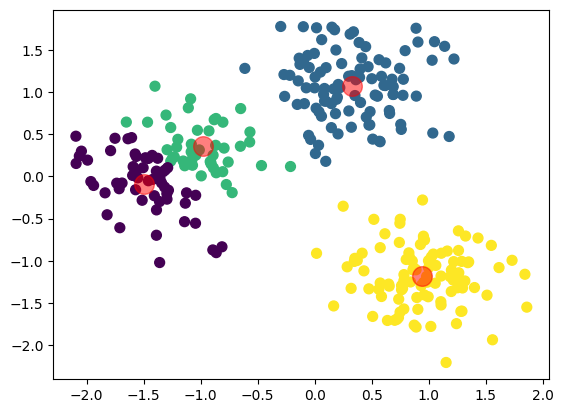

In [10]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')

#getting the coordinates of the centers
centers = kmeans.cluster_centers_
#plotting the centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

## Choosing the Appropriate Number of *Clusters*

Run the code cell below to compute the sum of the squared errors (SSE) for a various number of *clusters* between 1 and 10.

In [11]:
kmeans_kwargs = {"init": "random", "random_state": 42}

# A list holds the SSE values for each k
sse = []

#computing the SSE for different numbers of clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs) 
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)#getting the SSE

Finally, in the code cell below, plot the elbow curve.

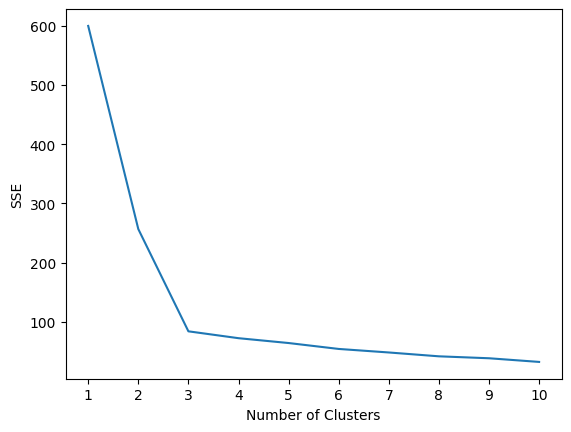

In [12]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

## Question 6

*2 points*

By looking at the graph above, determine the optimal number of *clusters* for this example. Assign your answer as an *integer* to the `ans6` variable.


In [ ]:
### GRADED

### YOUR SOLUTION HERE
ans6 = 3
